In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import field
import spatial
import timesteppers
import equations
from equations2 import SWFull
import equations3
import equations4

In [2]:
def plot_2D_field(xm, ym, data):
    fig = plt.figure(figsize=(4,3))
    ax = fig.add_subplot(111)
    pcm = ax.pcolormesh(xm, ym, data)
    ax.set_aspect(1)
    fig.colorbar(pcm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

<IPython.core.display.Javascript object>


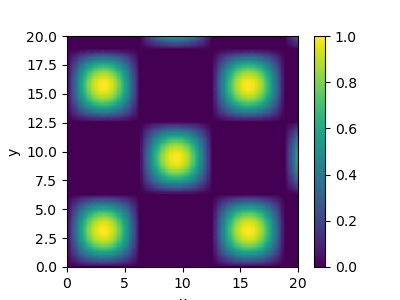

0.9998850239878958
0.9992659300053597
0.9979214794859694
0.9992708772906728
1.0032248829047812
1.006181995907353
1.0081103833042404
1.0104643529776978
1.0148668644199992
1.0196620083365577
1.0244853464864392
1.0312248369310848
1.0380840352390528
1.0435644778003954
1.0499622786706868
1.0598209109493666
1.0682507489567687
1.0753530253796788
1.084493887025316
1.0956405360619295
1.1055565244822478
1.1145260252206386
1.1268604010014316
1.1395903426582672
1.1535657343610162
1.1664739268277091
1.2398044836772335
1.3426572768053282
1.4636784858706189
1.587519878403543
1.737061328419144
1.885168376263823
2.0688326391589555
2.254023359842984
2.469963869572997
2.702405365283555
2.9512740505653987
3.2439752394334813
3.53410117083828
3.8937258932670455
4.263799738505226
4.668424481888996
5.13900225890549
5.739371874925517
6.713479925515718
7.996399081785932
9.314808483240384
11.051259600289727
12.794342899311404
15.153104334758076
17.506396047237633
20.61955726867001
23.82142555587961
27.8620535124

In [10]:
resolution=200
grid_x = field.UniformPeriodicGrid(resolution, 20)
grid_y = field.UniformPeriodicGrid(resolution, 20)
domain = field.Domain((grid_x, grid_y))
x, y = domain.values()

# BT = np.sin(x/2)*np.sin(y/2) + 3
BT = (0.1*x + 1) * (0.1*y + 1)

# IC = np.exp( - ( (x-np.pi)**2 + (y-np.pi)**2 ) )
IC = np.exp( - ( (x-10)**2 + (y-5)**2 ) )
# IC += np.exp( - ( (x-15)**2 + (y-15)**2 ) )
# IC += np.exp( - ( (x-10)**2 + (y-18)**2 ) )
# IC += np.exp( - ( (x-2)**2 + (y-7)**2 ) )
#IC += np.exp( - ( (x-10)**2 + (y-10)**2 ) )
#IC += np.exp( - ( (x-10)**2 + (y-15)**2 ) )


h = field.Field(domain)
u = field.Field(domain)
v = field.Field(domain)
H = field.Field(domain)

X = field.FieldSystem([u,v,h])

h.data[:] = IC
u.data[:] = 0*IC 
v.data[:] = 0*IC
H.data[:] = BT

g = 9.81
nu = 0
f = 0.5
b = 0.5

alpha = 0.05

sw = equations3.linearSW2(X, 2, g, f,b,H)
sw_problem=timesteppers.PredictorCorrector(sw)
dt = alpha*grid_x.dx

xm, ym = domain.plotting_arrays()

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
pcm = ax.pcolormesh(xm, ym, h.data)
ax.set_aspect(1)
fig.colorbar(pcm)
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.canvas.draw()
while sw_problem.t < 5 - 1e-5:
    sw_problem.step(dt)
    if sw_problem.iter % 10 == 0:
        pcm.set_array(np.ravel(h.data))
        #pcm.set_clim([0,np.max(h.data)])
        print(np.max(h.data))
        fig.canvas.draw()
print('done')

<IPython.core.display.Javascript object>


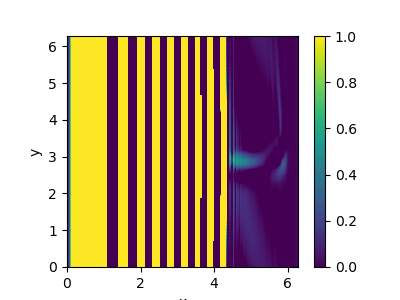

0.9999232980114577
0.9995861227955865
0.9989812870072102
0.998095114536279
0.9988316893878871
0.9992784829493586
0.9993987954534729
1.0003628557391064
1.0011195919281581
1.001532697690905
1.0016064555757347
1.00220488282541
1.0035960919587494
1.0046446819134704
1.0053541648813724
1.005728424659626
1.0057717058410542
1.005488601071909
1.0060155669942368
1.0082104695462784
1.010055582612744
1.011554504857081
1.0127111935196356
1.0135299500575872
1.0140154044902934
1.0141724986476812
1.0152805688303301
1.0166751344794802
1.0183201538340207
1.0201396076345872
1.0216198143836996
1.022765298833838
1.0248003095039973
1.0271684022379663
1.0291954333530047
1.0308646436708793
1.0320655148595992
1.0324124329804196
1.0324159211648787
1.0328972634025235
1.0326037428657855
1.0334010237806295
1.0360032562156878
1.0388713485795253
1.0452553031268503
1.0487417254193234
1.0479123717085386
1.0473618261611348
1.0440278864652588
1.036692736982563
1.0304736118497326
1.01975160507556
1.010316271495949
0.9998

In [21]:
resolution=200
grid_x = field.UniformPeriodicGrid(resolution, 2*np.pi)
grid_y = field.UniformPeriodicGrid(resolution, 2*np.pi)
domain = field.Domain((grid_x, grid_y))
x, y = domain.values()

BT = np.sin(x/2)*np.ones_like(y)
BT = np.sin(x/2)*np.sin(y/2)

IC = np.exp( - ( (x-np.pi)**2 + (y-np.pi)**2 )*8 )
IC += np.exp( - ( (x-15)**2 + (y-15)**2 ) )

# IC += np.exp( - ( (x-10)**2 + (y-18)**2 ) )
# IC += np.exp( - ( (x-2)**2 + (y-7)**2 ) )
#IC += np.exp( - ( (x-10)**2 + (y-10)**2 ) )
#IC += np.exp( - ( (x-10)**2 + (y-15)**2 ) )


h = field.Field(domain)
u = field.Field(domain)
v = field.Field(domain)
H = field.Field(domain)

X = field.FieldSystem([u,v,h])

h.data[:] = IC
u.data[:] = 0*IC 
v.data[:] = 0*IC
H.data[:] = BT

g = 9.81
nu = 0
f = 0.5
b = 0.5

alpha = 0.05

sw = equations3.linearSW2(X, 2, g, f,b,H)
sw_problem=timesteppers.PredictorCorrector(sw)
dt = alpha*grid_x.dx

xm, ym = domain.plotting_arrays()

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
pcm = ax.pcolormesh(xm, ym, H.data)
ax.set_aspect(1)
fig.colorbar(pcm)
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.canvas.draw()
while sw_problem.t < 5 - 1e-5:
    sw_problem.step(dt)
    if sw_problem.iter % 10 == 0:
        pcm.set_array(np.ravel(h.data))
        #pcm.set_clim([0,np.max(h.data)])
        print(np.max(h.data))
        fig.canvas.draw()
print('done')

In [20]:
resolution=200
grid_x = field.UniformPeriodicGrid(resolution, 20)
# grid_y = field.UniformPeriodicGrid(resolution, 20)
domain = field.Domain([grid_x])
x, = domain.values()

BT = (0.1*x + 1)
# IC = np.exp( - ( (x-np.pi)**2 + (y-np.pi)**2 ) )
IC = np.exp( -(x-5)**2 )
# IC += np.exp( - ( (x-15)**2 + (y-15)**2 ) )
# IC += np.exp( - ( (x-10)**2 + (y-18)**2 ) )
# IC += np.exp( - ( (x-2)**2 + (y-7)**2 ) )


h = field.Field(domain)
u = field.Field(domain)
# v = field.Field(domain)
H = field.Field(domain)

# X = field.FieldSystem([u,v,h,H])
# X = field.FieldSystem([h,u,v])
X = field.FieldSystem([u,h,H])
h.data[:] = IC
u.data[:] = 0*IC
#H.data[:] = BT

g = 9.81
nu = 0
f = 0.5
b = 0

alpha = 0.05

sw = equations3.linearSW1D(X, 2, g=g, f=f)
sw_problem=timesteppers.PredictorCorrector(sw)
dt = alpha*grid_x.dx


output_cadence = 10
fig = plt.figure(figsize=(4,3))
p, = plt.plot(x, u.data)
plt.ylim([0,1])
fig.canvas.draw()
while sw_problem.t < 1 - 1e-5:
    sw_problem.step(dt)
    if sw_problem.iter % output_cadence == 0:
        p.set_ydata(h.data)
        fig.canvas.draw()
        print(sw_problem.t)

NameError: name 'H' is not defined

<IPython.core.display.Javascript object>


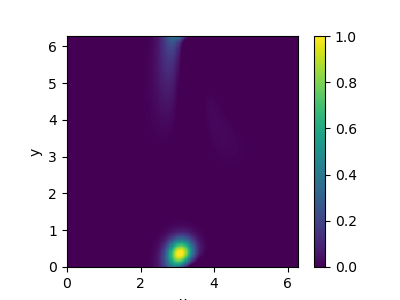

0.9998663488907858
0.9995154386766137
0.9990898896415444
0.9990336784487588
1.000507325341172
1.0016791841982755
1.0028272952845587
1.0046589005286692
1.0060496058652428
1.0070018788980106
1.0081633449439127
1.010431822027586
1.0122526546058206
1.0136307186976254
1.0145718249259745
1.0150826762662515
1.0151708190242952
1.0172684885264116
1.019945192676482
1.0221735328278598
1.0239472960070406
1.025300371849575
1.026292086759835


In [ ]:
resolution=200
grid_x = field.UniformPeriodicGrid(resolution, 2*np.pi)
grid_y = field.UniformPeriodicGrid(resolution, 2*np.pi)
domain = field.Domain((grid_x, grid_y))
x, y = domain.values()

#BT = np.sin(x/2)*np.ones_like(y)
BT = np.sin(x/2)*np.sin(y/2)+3

IC = np.exp( - ( (x-np.pi)**2 + (y-np.pi)**2 )*8 )


# IC += np.exp( - ( (x-10)**2 + (y-18)**2 ) )
# IC += np.exp( - ( (x-2)**2 + (y-7)**2 ) )
#IC += np.exp( - ( (x-10)**2 + (y-10)**2 ) )
#IC += np.exp( - ( (x-10)**2 + (y-15)**2 ) )


h = field.Field(domain)
u = field.Field(domain)
v = field.Field(domain)
H = field.Field(domain)

X = field.FieldSystem([u,v,h])

h.data[:] = IC
u.data[:] = 0*IC 
v.data[:] = 0*IC
H.data[:] = BT

g = 9.81
nu = 0.1
f = 0.5
b = 0.5

alpha = 0.05

sw = equations4.SWFull(X, 2, g, f,b,nu,H)
dt = alpha*grid_x.dx

xm, ym = domain.plotting_arrays()

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
pcm = ax.pcolormesh(xm, ym, h.data)
ax.set_aspect(1)
fig.colorbar(pcm)
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.canvas.draw()
while sw.t < 5 - 1e-5:
    sw.step(dt)
    if sw.iter % 10 == 0:
        pcm.set_array(np.ravel(h.data))
        #pcm.set_clim([0,np.max(h.data)])
        print(np.max(h.data))
        fig.canvas.draw()
print('done')